In [56]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv('/content/drive/MyDrive/all_bovespa.csv', sep=',')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,2018-01-02,AALR3,ALLIAR,14.94,15.16,14.70,14.89,94500.0,1.402991e+08
1,2018-01-02,AAPL34,APPLE,56.81,56.81,56.30,56.30,900.0,5.074700e+06
2,2018-01-02,ABCB4,ABC BRASIL,16.83,16.85,16.56,16.58,326300.0,5.433160e+08
3,2018-01-02,ABEV3,AMBEV S/A,21.33,21.75,21.17,21.69,12717900.0,2.748134e+10
4,2018-01-02,ADHM3,ADVANCED-DH,2.00,2.00,1.98,1.99,4600.0,9.176000e+05
...,...,...,...,...,...,...,...,...,...
678969,2022-12-28,WHRL4,WHIRLPOOL,5.02,5.34,5.02,5.06,3200.0,1.621600e+06
678970,2022-12-28,WIZS3,WIZ S.A.,6.88,6.96,6.75,6.94,744100.0,5.124806e+08
678971,2022-12-28,WLMM4,WLM IND COM,22.49,22.49,21.53,21.55,3700.0,7.998600e+06
678972,2022-12-28,YDUQ3,YDUQS PART,9.96,10.54,9.91,10.43,2838700.0,2.943400e+09


In [69]:
df['data_pregao'] = pd.to_datetime(df['data_pregao'], format='%Y-%m-%d')

In [122]:
df_acao= df [df['sigla_acao'] =='PETR4']
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
229,2018-01-02,PETR4,PETROBRAS,16.19,16.55,16.19,16.55,33461800.0,5.496281e+10
595,2018-01-03,PETR4,PETROBRAS,16.49,16.72,16.37,16.70,55940900.0,9.276100e+10
1002,2018-01-04,PETR4,PETROBRAS,16.78,16.96,16.62,16.73,37064900.0,6.240999e+10
1407,2018-01-05,PETR4,PETROBRAS,16.70,16.86,16.57,16.83,26958200.0,4.520076e+10
1805,2018-01-08,PETR4,PETROBRAS,16.74,17.03,16.71,17.03,28400000.0,4.805759e+10
...,...,...,...,...,...,...,...,...,...
677408,2022-12-22,PETR4,PETROBRAS,23.90,24.56,23.70,23.99,81894800.0,1.967333e+11
677773,2022-12-23,PETR4,PETROBRAS,24.13,25.22,24.13,25.12,68387900.0,1.698360e+11
678140,2022-12-26,PETR4,PETROBRAS,25.12,25.30,24.82,24.94,28765200.0,7.179042e+10
678504,2022-12-27,PETR4,PETROBRAS,25.25,25.31,24.55,25.11,50803200.0,1.264727e+11


In [123]:
df_acao_fec= df_acao[['data_pregao', 'preco_fechamento']]
df_acao_fec

,data_pregao,preco_fechamento
229,2018-01-02,16.55
595,2018-01-03,16.70
1002,2018-01-04,16.73
1407,2018-01-05,16.83
1805,2018-01-08,17.03
...,...,...
677408,2022-12-22,23.99
677773,2022-12-23,25.12
678140,2022-12-26,24.94
678504,2022-12-27,25.11


In [124]:
df_acao_fec = df_acao_fec.set_index (pd.DatetimeIndex(df_acao_fec['data_pregao'].values))

In [125]:
df_acao_fec

,data_pregao,preco_fechamento
2018-01-02,2018-01-02,16.55
2018-01-03,2018-01-03,16.70
2018-01-04,2018-01-04,16.73
2018-01-05,2018-01-05,16.83
2018-01-08,2018-01-08,17.03
...,...,...
2022-12-22,2022-12-22,23.99
2022-12-23,2022-12-23,25.12
2022-12-26,2022-12-26,24.94
2022-12-27,2022-12-27,25.11


In [126]:
df_acao_fec.drop('data_pregao', axis=1, inplace=True)
df_acao_fec

,preco_fechamento
2018-01-02,16.55
2018-01-03,16.70
2018-01-04,16.73
2018-01-05,16.83
2018-01-08,17.03
...,...
2022-12-22,23.99
2022-12-23,25.12
2022-12-26,24.94
2022-12-27,25.11


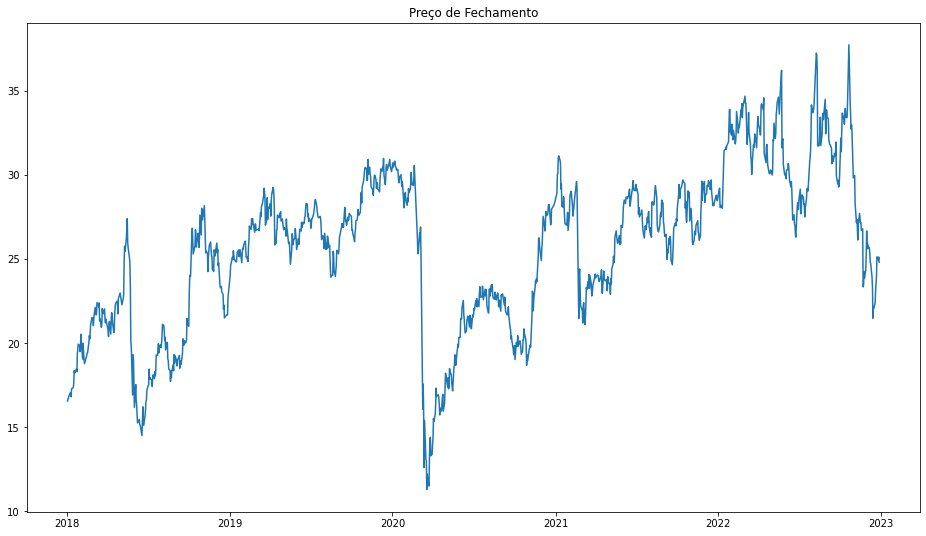

In [127]:
plt.figure(figsize=(16,9))
plt.title('Preço de Fechamento')
plt.plot(df_acao_fec['preco_fechamento'])


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
qtd_linhas = len(df_acao_fec)
qtd_linhas_treino = round(.70 * qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

In [130]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acao_fec)

In [131]:
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino:qtd_linhas_treino+qtd_linhas_teste]

print(len(train), len(test))

867 371


In [132]:
def create_df(df, steps=1):
    dataX, dataY = [], []
    for i in range(len(df)-steps-1):
      dataX.append(df[i:(i+steps), 0])
      dataY.append(df[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [133]:
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

In [134]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [135]:
model = Sequential ()
model.add(LSTM(35, return_sequences=True, input_shape= (steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))


In [136]:
model.compile(optimizer= 'adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 15, 35)            5180      
                                                                 
 lstm_7 (LSTM)               (None, 15, 35)            9940      
                                                                 
 lstm_8 (LSTM)               (None, 35)                9940      
                                                                 
 dropout_2 (Dropout)         (None, 35)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 36        
                                                                 
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [137]:
validation = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=15, verbose=2)

Epoch 1/100
57/57 - 9s - loss: 0.2760 - val_loss: 0.3181 - 9s/epoch - 151ms/step
Epoch 2/100
57/57 - 1s - loss: 0.1300 - val_loss: 0.1578 - 1s/epoch - 24ms/step
Epoch 3/100
57/57 - 1s - loss: 0.0933 - val_loss: 0.1902 - 1s/epoch - 24ms/step
Epoch 4/100
57/57 - 1s - loss: 0.0860 - val_loss: 0.1503 - 1s/epoch - 25ms/step
Epoch 5/100
57/57 - 1s - loss: 0.0715 - val_loss: 0.1415 - 1s/epoch - 26ms/step
Epoch 6/100
57/57 - 1s - loss: 0.0659 - val_loss: 0.1125 - 1s/epoch - 24ms/step
Epoch 7/100
57/57 - 1s - loss: 0.0604 - val_loss: 0.1259 - 1s/epoch - 24ms/step
Epoch 8/100
57/57 - 1s - loss: 0.0573 - val_loss: 0.1504 - 1s/epoch - 24ms/step
Epoch 9/100
57/57 - 1s - loss: 0.0539 - val_loss: 0.1066 - 1s/epoch - 24ms/step
Epoch 10/100
57/57 - 1s - loss: 0.0539 - val_loss: 0.0945 - 1s/epoch - 23ms/step
Epoch 11/100
57/57 - 1s - loss: 0.0487 - val_loss: 0.1152 - 1s/epoch - 23ms/step
Epoch 12/100
57/57 - 1s - loss: 0.0515 - val_loss: 0.0987 - 1s/epoch - 22ms/step
Epoch 13/100
57/57 - 1s - loss: 0.04

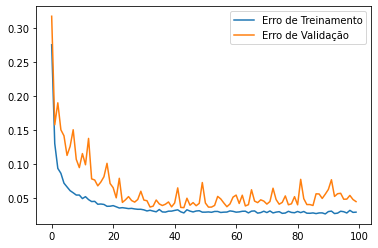

In [138]:
plt.plot(validation.history['loss'], label='Erro de Treinamento')
plt.plot(validation.history['val_loss'], label= 'Erro de Validação')
plt.legend()

In [139]:
#Previsão
prev= model.predict(X_test)
prev= scaler.inverse_transform(prev)
prev

12/12 [==============================] - 1s 8ms/step


array([[27.206139],
       [27.821314],
       [27.932072],
       [26.873724],
       [26.421352],
       [27.111145],
       [26.435577],
       [28.548115],
       [28.57224 ],
       [28.12778 ],
       [28.243612],
       [28.762156],
       [29.217583],
       [29.420845],
       [28.584978],
       [26.811419],
       [27.072031],
       [27.02067 ],
       [26.918964],
       [27.303402],
       [27.776968],
       [27.75271 ],
       [27.366016],
       [28.618748],
       [28.350584],
       [26.971216],
       [27.138113],
       [26.790466],
       [26.541039],
       [26.70386 ],
       [24.812027],
       [25.57374 ],
       [25.275564],
       [26.313519],
       [25.819807],
       [26.312916],
       [26.087708],
       [24.799656],
       [24.621132],
       [25.307238],
       [25.984425],
       [26.948446],
       [27.021055],
       [27.171124],
       [26.999208],
       [27.450972],
       [27.355139],
       [28.115908],
       [28.888298],
       [29.439432],


In [140]:
#Previsão para os próximos 10 dias
lenght_test= (len(test))
lenght_test

371

In [141]:
days_input_steps= lenght_test - steps
days_input_steps

356

In [142]:
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[-0.18121266, -0.19603828, -0.36547394, -0.49043273, -0.88225268,
        -0.76152978, -0.75941183, -0.68951962, -0.54338137, -0.43748409,
        -0.34853037, -0.10920251, -0.14732553, -0.11132046, -0.17697677]])

In [143]:
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[-0.18121266290558896,
 -0.1960382825643994,
 -0.3654739358079467,
 -0.49043273007506266,
 -0.8822526782007657,
 -0.7615297752647383,
 -0.7594118295991936,
 -0.6895196226362308,
 -0.5433813717136711,
 -0.43748408843645414,
 -0.3485303704835923,
 -0.10920251027708147,
 -0.1473255322568795,
 -0.11132045594262614,
 -0.17697677157450037]

In [144]:
pred_output=[]
i=0
n_future=10
while(i<n_future):

    if(len(list_output_steps)>steps):
      input_steps = np.array(list_output_steps[1:])
      print("{} dia. Valores de Entrada ->{}" .format(i,input_steps) )
      input_steps = input_steps.reshape(1,-1)
      input_steps = input_steps.reshape((1, steps, 1))
      pred = model.predict(input_steps, verbose=0)
      print("{} dia. Valor Previsto -> {}" .format(i, pred))
      list_output_steps.extend(pred[0].tolist())
      list_output_steps=list_output_steps[1:]
      pred_output.extend(pred.tolist())
      i=i+1
    else:
      input_steps = input_steps.reshape((1, steps, 1))
      pred = model.predict(input_steps, verbose=0)
      print(pred[0])
      list_output_steps.extend(pred[0].tolist())
      print(len(list_output_steps))
      pred_output.extend(pred.tolist())
      i=i+1

print(pred_output)



[-0.14096224]
16
1 dia. Valores de Entrada ->[-0.19603828 -0.36547394 -0.49043273 -0.88225268 -0.76152978 -0.75941183
 -0.68951962 -0.54338137 -0.43748409 -0.34853037 -0.10920251 -0.14732553
 -0.11132046 -0.17697677 -0.14096224]
1 dia. Valor Previsto -> [[-0.11463846]]
2 dia. Valores de Entrada ->[-0.36547394 -0.49043273 -0.88225268 -0.76152978 -0.75941183 -0.68951962
 -0.54338137 -0.43748409 -0.34853037 -0.10920251 -0.14732553 -0.11132046
 -0.17697677 -0.14096224 -0.11463846]
2 dia. Valor Previsto -> [[-0.08410892]]
3 dia. Valores de Entrada ->[-0.49043273 -0.88225268 -0.76152978 -0.75941183 -0.68951962 -0.54338137
 -0.43748409 -0.34853037 -0.10920251 -0.14732553 -0.11132046 -0.17697677
 -0.14096224 -0.11463846 -0.08410892]
3 dia. Valor Previsto -> [[-0.05328076]]
4 dia. Valores de Entrada ->[-0.88225268 -0.76152978 -0.75941183 -0.68951962 -0.54338137 -0.43748409
 -0.34853037 -0.10920251 -0.14732553 -0.11132046 -0.17697677 -0.14096224
 -0.11463846 -0.08410892 -0.05328076]
4 dia. Valor

In [145]:
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[24.970044629001872,
 25.094333879176087,
 25.238480807983212,
 25.38403768452971,
 25.520735881943867,
 25.646932818144986,
 25.763450997826038,
 25.874174250084263,
 25.98333692096489,
 26.09416373824669]

In [146]:
dates= pd.to_datetime(df_acao['data_pregao'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods=10, freq='b').tolist()
predict_dates

[Timestamp('2022-12-29 00:00:00', freq='B'),
 Timestamp('2022-12-30 00:00:00', freq='B'),
 Timestamp('2023-01-02 00:00:00', freq='B'),
 Timestamp('2023-01-03 00:00:00', freq='B'),
 Timestamp('2023-01-04 00:00:00', freq='B'),
 Timestamp('2023-01-05 00:00:00', freq='B'),
 Timestamp('2023-01-06 00:00:00', freq='B'),
 Timestamp('2023-01-09 00:00:00', freq='B'),
 Timestamp('2023-01-10 00:00:00', freq='B'),
 Timestamp('2023-01-11 00:00:00', freq='B')]

In [147]:
##Dataframe de Previsão
forecast_dates = []
for i in predict_dates:
  forecast_dates.append(i.date())

df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates), 'preco_fechamento':list_output_prev})
df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])

df_forecast=df_forecast.set_index(pd.DatetimeIndex(df_forecast['data_pregao'].values))
df_forecast.drop('data_pregao', axis=1, inplace=True)
df_forecast

,preco_fechamento
2022-12-29,24.970045
2022-12-30,25.094334
2023-01-02,25.238481
2023-01-03,25.384038
2023-01-04,25.520736
2023-01-05,25.646933
2023-01-06,25.763451
2023-01-09,25.874174
2023-01-10,25.983337
2023-01-11,26.094164


In [148]:
df_acao= df[ (df['sigla_acao']== 'BBAS3') & (df['data_pregao'] >'2022-10-01')]
df_acao_fec = df_acao[['data_pregao', 'preco_fechamento']]
df_acao_fec=df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['data_pregao'].values))
df_acao_fec.drop('data_pregao', axis=1, inplace=True)
df_acao_fec

,preco_fechamento
2022-10-03,41.46
2022-10-04,39.23
2022-10-05,39.86
2022-10-06,40.57
2022-10-07,40.66
2022-10-10,40.07
2022-10-11,39.11
2022-10-13,39.38
2022-10-14,39.16
2022-10-17,39.49


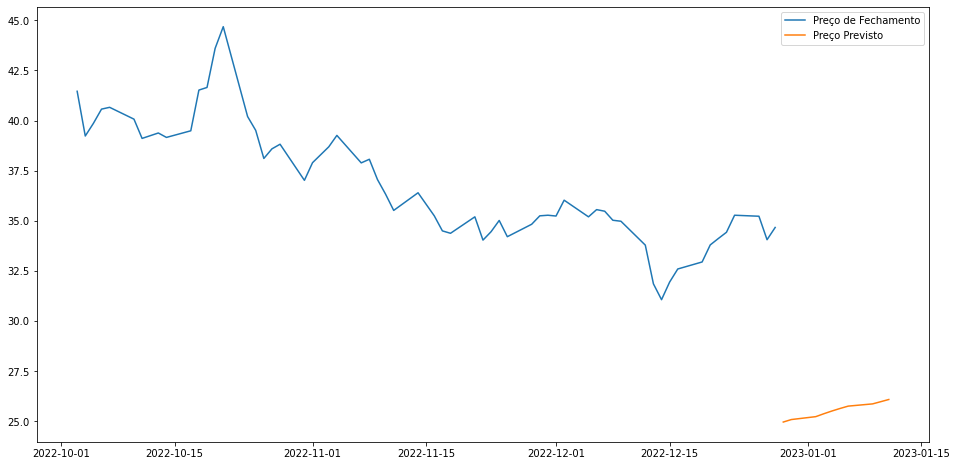

In [149]:
#Grafico
plt.figure(figsize=(16,8))
plt.plot(df_acao_fec['preco_fechamento'])
plt.plot(df_forecast['preco_fechamento'])
plt.legend(['Preço de Fechamento', 'Preço Previsto'])
plt.show()
